In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("yasserh/titanic-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'titanic-dataset' dataset.
Path to dataset files: /kaggle/input/titanic-dataset


In [ ]:
df = pd.read_csv(path+'/Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
dfle = df
dfle.Age = le.fit_transform(dfle.Age)
dfle.Cabin = le.fit_transform(dfle.Cabin)
dfle.Embarked = le.fit_transform(dfle.Embarked)
dfle.Sex = le.fit_transform(dfle.Sex)
dfle

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,28,1,0,A/5 21171,7.2500,147,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,51,1,0,PC 17599,71.2833,81,0
2,3,1,3,"Heikkinen, Miss. Laina",0,34,0,0,STON/O2. 3101282,7.9250,147,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,47,1,0,113803,53.1000,55,2
4,5,0,3,"Allen, Mr. William Henry",1,47,0,0,373450,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,35,0,0,211536,13.0000,147,2
887,888,1,1,"Graham, Miss. Margaret Edith",0,24,0,0,112053,30.0000,30,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,88,1,2,W./C. 6607,23.4500,147,2
889,890,1,1,"Behr, Mr. Karl Howell",1,34,0,0,111369,30.0000,60,0


In [ ]:
dfle.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,48.609428,0.523008,0.381594,32.204208,130.744108,1.538721
std,257.353842,0.486592,0.836071,25.539308,1.102743,0.806057,49.693429,36.024237,0.794231
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,28.000000,0.000000,0.000000,7.910400,147.000000,1.000000
50%,446.000000,0.000000,3.000000,42.000000,0.000000,0.000000,14.454200,147.000000,2.000000
75%,668.500000,1.000000,3.000000,69.000000,1.000000,0.000000,31.000000,147.000000,2.000000
max,891.000000,1.000000,3.000000,88.000000,8.000000,6.000000,512.329200,147.000000,3.000000


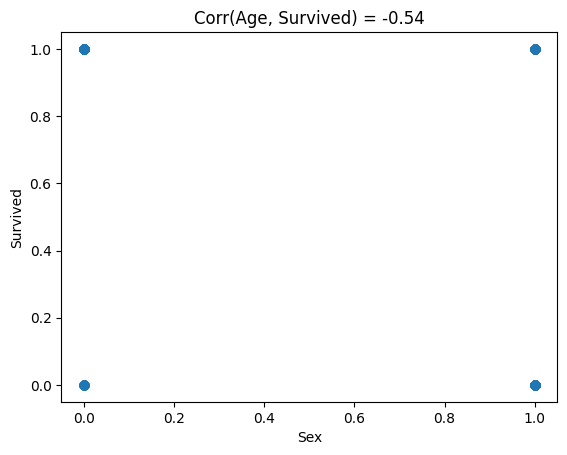

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(dfle['Sex'], dfle['Survived'])
plt.xlabel('Sex')
plt.ylabel('Survived')
plt.title(f'Corr(Age, Survived) = {dfle["Sex"].corr(dfle["Survived"]):.2f}')
plt.show()

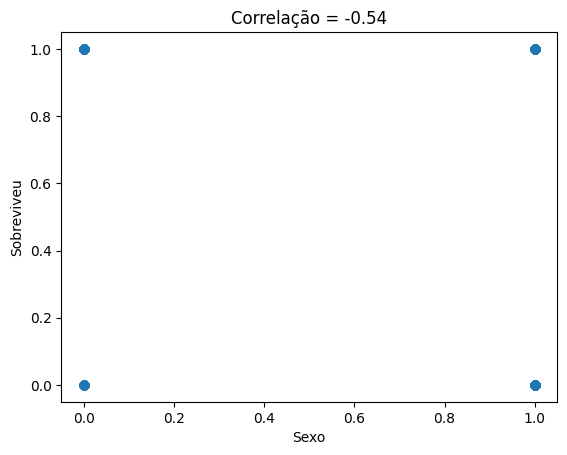

In [ ]:
corr = dfle['Sex'].corr(dfle['Survived'])

plt.scatter(dfle['Sex'], dfle['Survived'])
plt.title(f'Correlação = {corr:.2f}')
plt.xlabel('Sexo')
plt.ylabel('Sobreviveu')
plt.show()


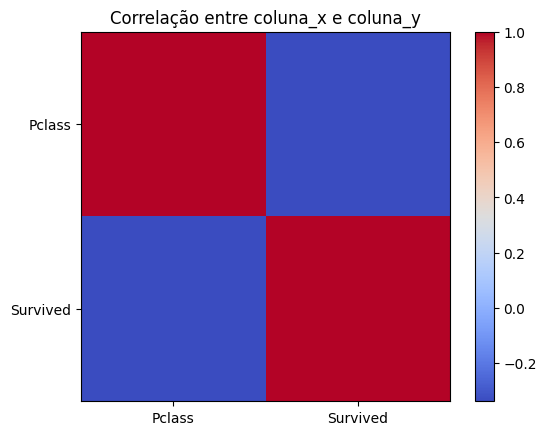

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

corr = df[['Pclass', 'Survived']].corr()

plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(np.arange(len(corr.columns)), corr.columns)
plt.yticks(np.arange(len(corr.columns)), corr.columns)
plt.title('Correlação entre coluna_x e coluna_y')
plt.show()


In [ ]:
X = dfle.drop(['Survived', 'PassengerId', 'Name', 'Cabin', 'Ticket'], axis=1)

In [ ]:
y = dfle['Survived']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
len(X_test)

179

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0])

In [ ]:
model.score(X_test, y_test)

0.8324022346368715

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[98, 14],
       [16, 51]])

Text(95.72222222222221, 0.5, 'Real')

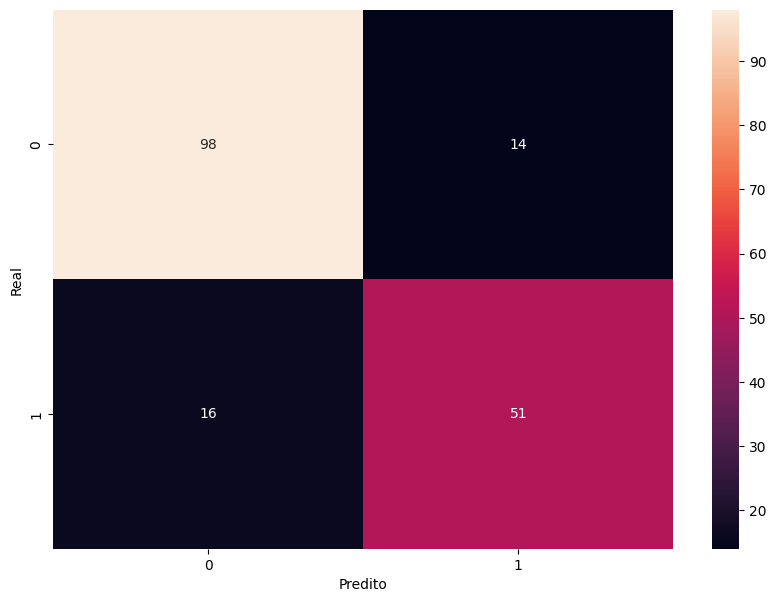

In [ ]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predito')
plt.ylabel('Real')